In [183]:
import os
os.environ['USE_PYGEOS'] = '0'
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx 
from shapely.geometry import Point, LineString
from shapely import distance
import numpy as np
from pyproj import Transformer
from shapely.geometry import LineString
import shapely.ops as sp_ops
import warnings
warnings.filterwarnings("ignore")

In [184]:
path = os.getcwd()
parent = os.path.dirname(path)
main_folder_path =os.path.normpath(os.getcwd() + os.sep + os.pardir)
df = gpd.read_file(main_folder_path+"\data\gis\osm\\roads.shp")  

In [185]:
road_names = df[df["ref"].notnull()]["ref"].unique()
road_names_N = [road for road in road_names if road.startswith("N")]
# road_names_N1 = [road for road in road_names_N if "1" in road]

df_N = df[df["ref"].isin(road_names_N)]
df_N["ref"]=df_N["ref"].str.replace(" ","")
# df_N["ref"]=df_N["ref"].str.replace("H","")


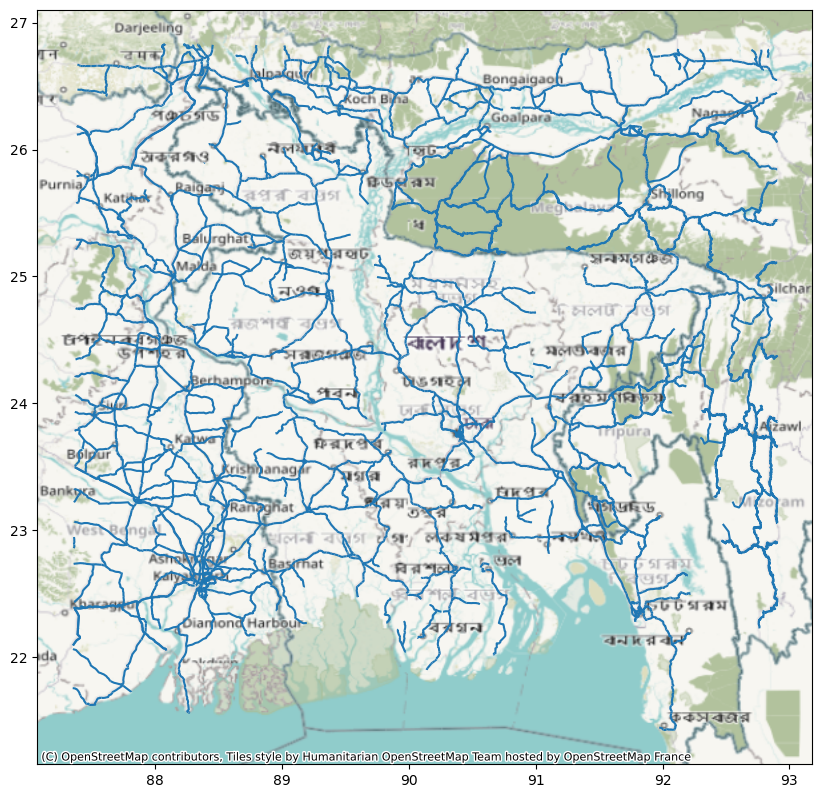

In [186]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
df_primary  =df[(df["type"]=="primary")|(df["type"]=="trunk")]
df_primary.plot(ax=ax)
cx.add_basemap(ax=ax,crs="epsg:4326")

In [187]:
from shapely import wkt

In [188]:
df_sections = pd.read_csv(main_folder_path + "\\data\\intersections.csv")#pd.read_csv(main_folder_path + "\\data\\intersections_BONUS.csv")
df_sections

,Unnamed: 0,road,chainage,lrp,lat,lon,gap,type,name,geometry,intersec_to
0,0,N1,81.801,LRP083a,23.478944,91.117722,NaN,intersection,Box culvert,POINT (91.1177216 23.4789438),N102
1,1,N1,143.795,LRP147,23.019360,91.369777,NaN,intersection,"Ctg 98 km,Feni 2 km",POINT (91.3697771 23.0193604),N104
2,2,N1,10.885,LRP011a,23.694361,90.537611,NaN,intersection,Box culvert,POINT (90.5376108 23.6943608),N105
3,3,N1,8.000,LRP008,23.702056,90.515722,NaN,intersection,Km post missing,POINT (90.5157222 23.7020556),N2
4,4,N1,0.000,LRPS,23.706028,90.443333,NaN,intersection,Start of Road after Jatrabari Flyover infront...,POINT (90.443333 23.7060278),N8
5,5,N2,0.000,LRPS,23.705917,90.521444,NaN,intersection,Road Start from N1 at Katchpur,POINT (90.5214438 23.7059167),N1
6,6,N2,85.098,LRP085b,24.049694,91.107639,NaN,intersection,Box culvert,POINT (91.1076389 24.0496941),N102
7,7,N2,10.196,LRP011,23.777472,90.561667,NaN,intersection,Km post broken,POINT (90.5616667 23.7774716),N105
8,8,N2,140.657,LRP141a,24.267138,91.470638,NaN,intersection,Box culvert,POINT (91.4706382 24.2671382),N204
9,9,N2,115.916,LRP117,24.146639,91.343055,NaN,intersection,Sylhet 115 km,POINT (91.3430552 24.1466386),N204


In [189]:
main_folder_path =os.path.normpath(os.getcwd() + os.sep + os.pardir)
df_sections = pd.read_csv(main_folder_path + "\\data\\intersections_BONUS.csv")#pd.read_csv(main_folder_path + "\\data\\intersections_BONUS.csv")
df_sections["geometry"]=df_sections["geometry"].apply(wkt.loads)
df_sections = gpd.GeoDataFrame(df_sections,geometry="geometry", crs="EPSG:4326")#.drop(columns="0")
# df_sections

In [190]:
df_sections

,Unnamed: 0,road,chainage,lrp,lat,lon,gap,type,name,geometry,intersec_to
0,0,N1,81.801,LRP083a,23.478944,91.117722,NaN,intersection,Box culvert,POINT (91.11772 23.47894),N102
1,1,N1,143.795,LRP147,23.019360,91.369777,NaN,intersection,"Ctg 98 km,Feni 2 km",POINT (91.36978 23.01936),N104
2,2,N1,10.885,LRP011a,23.694361,90.537611,NaN,intersection,Box culvert,POINT (90.53761 23.69436),N105
3,3,N1,8.000,LRP008,23.702056,90.515722,NaN,intersection,Km post missing,POINT (90.51572 23.70206),N2
4,4,N1,0.000,LRPS,23.706028,90.443333,NaN,intersection,Start of Road after Jatrabari Flyover infront...,POINT (90.44333 23.70603),N8
5,5,N2,0.000,LRPS,23.705917,90.521444,NaN,intersection,Road Start from N1 at Katchpur,POINT (90.52144 23.70592),N1
6,6,N2,85.098,LRP085b,24.049694,91.107639,NaN,intersection,Box culvert,POINT (91.10764 24.04969),N102
7,7,N2,10.196,LRP011,23.777472,90.561667,NaN,intersection,Km post broken,POINT (90.56167 23.77747),N105
8,8,N2,140.657,LRP141a,24.267138,91.470638,NaN,intersection,Box culvert,POINT (91.47064 24.26714),N204
9,9,N2,115.916,LRP117,24.146639,91.343055,NaN,intersection,Sylhet 115 km,POINT (91.34306 24.14664),N204


In [191]:
df_sections

,Unnamed: 0,road,chainage,lrp,lat,lon,gap,type,name,geometry,intersec_to
0,0,N1,81.801,LRP083a,23.478944,91.117722,NaN,intersection,Box culvert,POINT (91.11772 23.47894),N102
1,1,N1,143.795,LRP147,23.019360,91.369777,NaN,intersection,"Ctg 98 km,Feni 2 km",POINT (91.36978 23.01936),N104
2,2,N1,10.885,LRP011a,23.694361,90.537611,NaN,intersection,Box culvert,POINT (90.53761 23.69436),N105
3,3,N1,8.000,LRP008,23.702056,90.515722,NaN,intersection,Km post missing,POINT (90.51572 23.70206),N2
4,4,N1,0.000,LRPS,23.706028,90.443333,NaN,intersection,Start of Road after Jatrabari Flyover infront...,POINT (90.44333 23.70603),N8
5,5,N2,0.000,LRPS,23.705917,90.521444,NaN,intersection,Road Start from N1 at Katchpur,POINT (90.52144 23.70592),N1
6,6,N2,85.098,LRP085b,24.049694,91.107639,NaN,intersection,Box culvert,POINT (91.10764 24.04969),N102
7,7,N2,10.196,LRP011,23.777472,90.561667,NaN,intersection,Km post broken,POINT (90.56167 23.77747),N105
8,8,N2,140.657,LRP141a,24.267138,91.470638,NaN,intersection,Box culvert,POINT (91.47064 24.26714),N204
9,9,N2,115.916,LRP117,24.146639,91.343055,NaN,intersection,Sylhet 115 km,POINT (91.34306 24.14664),N204


In [192]:
from shapely import buffer
points = []
for point in df_sections["geometry"]:
    point = buffer(point,0.1)
    points.append(point)

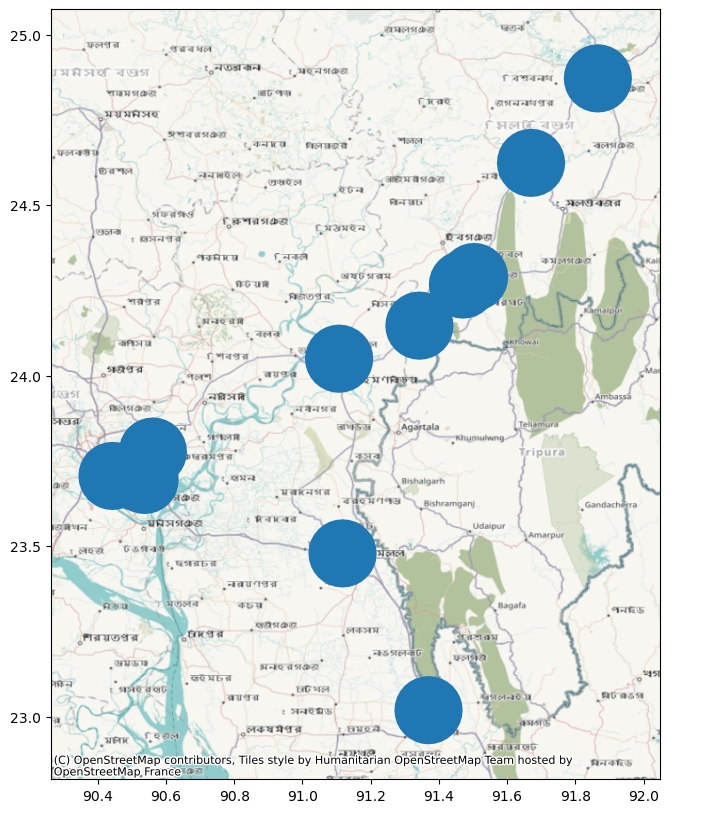

In [193]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
gpd.GeoSeries(points,crs="4326").plot(ax=ax)
cx.add_basemap(ax=ax,crs="EPSG:4326")

<AxesSubplot:>

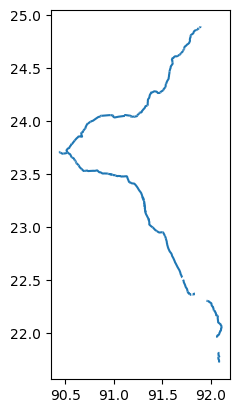

In [194]:
df_primary["ref"]=df_primary["ref"].str.replace(" ","")

df_N1N2=df_primary[(df_primary["ref"]=="N1")|(df_primary["ref"]=="N2")]
df_N1N2.plot()

In [195]:
df_normal_data = pd.read_csv(main_folder_path + "\\data\\_roads3.csv")

gdf_normal = gpd.GeoDataFrame(df_normal_data, geometry=gpd.points_from_xy(df_normal_data.lon, df_normal_data.lat), crs="EPSG:4326")
from shapely import buffer
lines = []
for name in ["N1","N2"]:
    gdf_temp = gdf_normal[gdf_normal["road"]==name]
    line = buffer(LineString(gdf_temp["geometry"]),0.1)
    lines.append(line)

In [196]:
cross_index_N1=[]
cross_index_N2=[]
for index in df_primary.index:
    if lines[0].intersects(df_primary.loc[index,"geometry"]):
        cross_index_N1.append(index)
    if lines[1].intersects(df_primary.loc[index,"geometry"]):
        cross_index_N2.append(index)


intersecting_N1 =df_primary[df_primary.index.isin(cross_index_N1)]
intersecting_N2 =df_primary[df_primary.index.isin(cross_index_N2)]
intersecting_N1N2=pd.concat([intersecting_N1,intersecting_N2])

intersecting_N1N2= intersecting_N1N2[~intersecting_N1N2["ref"].str.replace(" ","").isin(["N1","N2"])]


<AxesSubplot:>

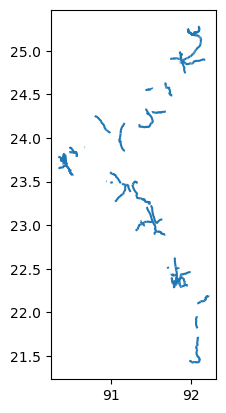

In [197]:
intersecting_N1N2.plot()

In [198]:
Intersect_points = []
for line_N1N2 in df_N1N2["geometry"]:
    for intersect_line in intersecting_N1N2["geometry"]:
        if line_N1N2!=intersect_line:
            if line_N1N2.intersects(intersect_line):
               Intersect_points.append(line_N1N2.intersection(intersect_line))
            
    

In [199]:
df_primary["ref"]=df_primary["ref"].str.replace(" ","")

df_N1N2=df_primary[(df_primary["ref"]=="N1")|(df_primary["ref"]=="N2")]

In [200]:

# df_used_intersects = pd.read_csv(main_folder_path+"\data\intersections.csv")
# gdf_used_intersects = gpd.GeoDataFrame(df_used_intersects, crs="EPSG:4326")

In [201]:
df_sections

,Unnamed: 0,road,chainage,lrp,lat,lon,gap,type,name,geometry,intersec_to
0,0,N1,81.801,LRP083a,23.478944,91.117722,NaN,intersection,Box culvert,POINT (91.11772 23.47894),N102
1,1,N1,143.795,LRP147,23.019360,91.369777,NaN,intersection,"Ctg 98 km,Feni 2 km",POINT (91.36978 23.01936),N104
2,2,N1,10.885,LRP011a,23.694361,90.537611,NaN,intersection,Box culvert,POINT (90.53761 23.69436),N105
3,3,N1,8.000,LRP008,23.702056,90.515722,NaN,intersection,Km post missing,POINT (90.51572 23.70206),N2
4,4,N1,0.000,LRPS,23.706028,90.443333,NaN,intersection,Start of Road after Jatrabari Flyover infront...,POINT (90.44333 23.70603),N8
5,5,N2,0.000,LRPS,23.705917,90.521444,NaN,intersection,Road Start from N1 at Katchpur,POINT (90.52144 23.70592),N1
6,6,N2,85.098,LRP085b,24.049694,91.107639,NaN,intersection,Box culvert,POINT (91.10764 24.04969),N102
7,7,N2,10.196,LRP011,23.777472,90.561667,NaN,intersection,Km post broken,POINT (90.56167 23.77747),N105
8,8,N2,140.657,LRP141a,24.267138,91.470638,NaN,intersection,Box culvert,POINT (91.47064 24.26714),N204
9,9,N2,115.916,LRP117,24.146639,91.343055,NaN,intersection,Sylhet 115 km,POINT (91.34306 24.14664),N204


In [202]:
shape_file_intersects = gpd.GeoSeries(Intersect_points,crs="4326")

<AxesSubplot:>

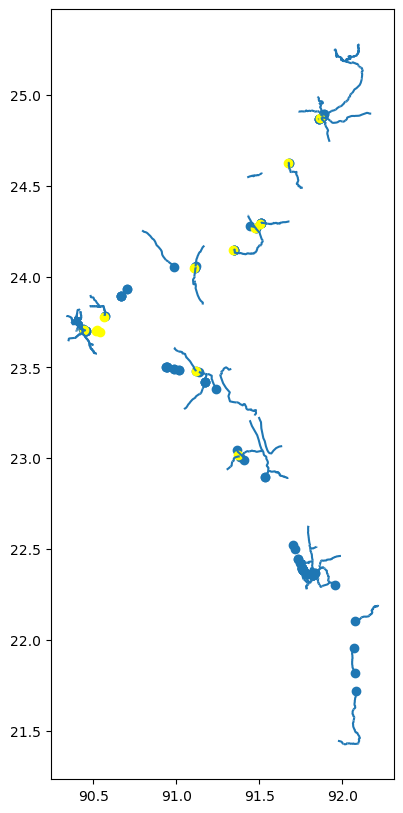

In [203]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
intersecting_N1N2.plot(ax=ax)

shape_file_intersects.plot(ax=ax)
df_sections.plot(ax=ax,color="yellow")

In [204]:
df_sections

,Unnamed: 0,road,chainage,lrp,lat,lon,gap,type,name,geometry,intersec_to
0,0,N1,81.801,LRP083a,23.478944,91.117722,NaN,intersection,Box culvert,POINT (91.11772 23.47894),N102
1,1,N1,143.795,LRP147,23.019360,91.369777,NaN,intersection,"Ctg 98 km,Feni 2 km",POINT (91.36978 23.01936),N104
2,2,N1,10.885,LRP011a,23.694361,90.537611,NaN,intersection,Box culvert,POINT (90.53761 23.69436),N105
3,3,N1,8.000,LRP008,23.702056,90.515722,NaN,intersection,Km post missing,POINT (90.51572 23.70206),N2
4,4,N1,0.000,LRPS,23.706028,90.443333,NaN,intersection,Start of Road after Jatrabari Flyover infront...,POINT (90.44333 23.70603),N8
5,5,N2,0.000,LRPS,23.705917,90.521444,NaN,intersection,Road Start from N1 at Katchpur,POINT (90.52144 23.70592),N1
6,6,N2,85.098,LRP085b,24.049694,91.107639,NaN,intersection,Box culvert,POINT (91.10764 24.04969),N102
7,7,N2,10.196,LRP011,23.777472,90.561667,NaN,intersection,Km post broken,POINT (90.56167 23.77747),N105
8,8,N2,140.657,LRP141a,24.267138,91.470638,NaN,intersection,Box culvert,POINT (91.47064 24.26714),N204
9,9,N2,115.916,LRP117,24.146639,91.343055,NaN,intersection,Sylhet 115 km,POINT (91.34306 24.14664),N204


In [205]:
from shapely.geometry import MultiPoint

In [206]:
something = MultiPoint([(0, 0), (1, 1), (2, 2)])
isinstance(something, MultiPoint)

True

In [207]:
 shape_file_intersects=shape_file_intersects[~shape_file_intersects.apply(lambda x: isinstance(x, MultiPoint))]

In [208]:
 # shape_file_intersects=shape_file_intersects[~shape_file_intersects.apply(lambda x: isinstance(x, MultiPoint))]

In [209]:

final_pair = []
for section in df_sections["geometry"]:
    min_dist = 10000
    for shape_file_intersect in shape_file_intersects.unique():
        
        # print(section,shape_file_intersect)
        if isinstance(shape_file_intersect, MultiPoint):
            for point in list(shape_file_intersect.geoms):
                dist = distance(section, point)
                if dist < min_dist:
                    min_dist = dist
                    closest_point_pair = (section,point)
                # print(LineString([point,section]))
        else:
            # print(LineString([shape_file_intersect,section]))
            dist = distance(section, shape_file_intersect)
            if dist < min_dist:
                min_dist = dist
                closest_point_pair = (section.centroid,shape_file_intersect.centroid)
    final_pair.append(closest_point_pair)

In [210]:
final_pair

[(<POINT (91.118 23.479)>, <POINT (91.118 23.479)>),
 (<POINT (91.37 23.019)>, <POINT (91.381 23.01)>),
 (<POINT (90.538 23.694)>, <POINT (90.452 23.702)>),
 (<POINT (90.516 23.702)>, <POINT (90.452 23.702)>),
 (<POINT (90.443 23.706)>, <POINT (90.435 23.71)>),
 (<POINT (90.521 23.706)>, <POINT (90.452 23.702)>),
 (<POINT (91.108 24.05)>, <POINT (91.114 24.05)>),
 (<POINT (90.562 23.777)>, <POINT (90.569 23.785)>),
 (<POINT (91.471 24.267)>, <POINT (91.477 24.267)>),
 (<POINT (91.343 24.147)>, <POINT (91.346 24.147)>),
 (<POINT (91.67 24.624)>, <POINT (91.677 24.626)>),
 (<POINT (91.503 24.289)>, <POINT (91.51 24.294)>),
 (<POINT (91.866 24.871)>, <POINT (91.858 24.868)>)]

In [211]:
for index,pair in enumerate(final_pair):
    print(index,pair)

0 (<POINT (91.118 23.479)>, <POINT (91.118 23.479)>)
1 (<POINT (91.37 23.019)>, <POINT (91.381 23.01)>)
2 (<POINT (90.538 23.694)>, <POINT (90.452 23.702)>)
3 (<POINT (90.516 23.702)>, <POINT (90.452 23.702)>)
4 (<POINT (90.443 23.706)>, <POINT (90.435 23.71)>)
5 (<POINT (90.521 23.706)>, <POINT (90.452 23.702)>)
6 (<POINT (91.108 24.05)>, <POINT (91.114 24.05)>)
7 (<POINT (90.562 23.777)>, <POINT (90.569 23.785)>)
8 (<POINT (91.471 24.267)>, <POINT (91.477 24.267)>)
9 (<POINT (91.343 24.147)>, <POINT (91.346 24.147)>)
10 (<POINT (91.67 24.624)>, <POINT (91.677 24.626)>)
11 (<POINT (91.503 24.289)>, <POINT (91.51 24.294)>)
12 (<POINT (91.866 24.871)>, <POINT (91.858 24.868)>)


In [212]:
import matplotlib.lines as mlines


# etc etc, nine])

In [213]:

transformer = Transformer.from_crs('EPSG:4326', 'EPSG:3857', always_xy=True)

44.0707237976889
1757.6026708634288
9530.399215371266
7050.880203026716
1076.0084293482507
7704.041276985551
735.4616667029874
1227.5456884565192
701.3767463824739
326.2664108392408
797.1738450006123
976.3173118326024
1064.5624825087493


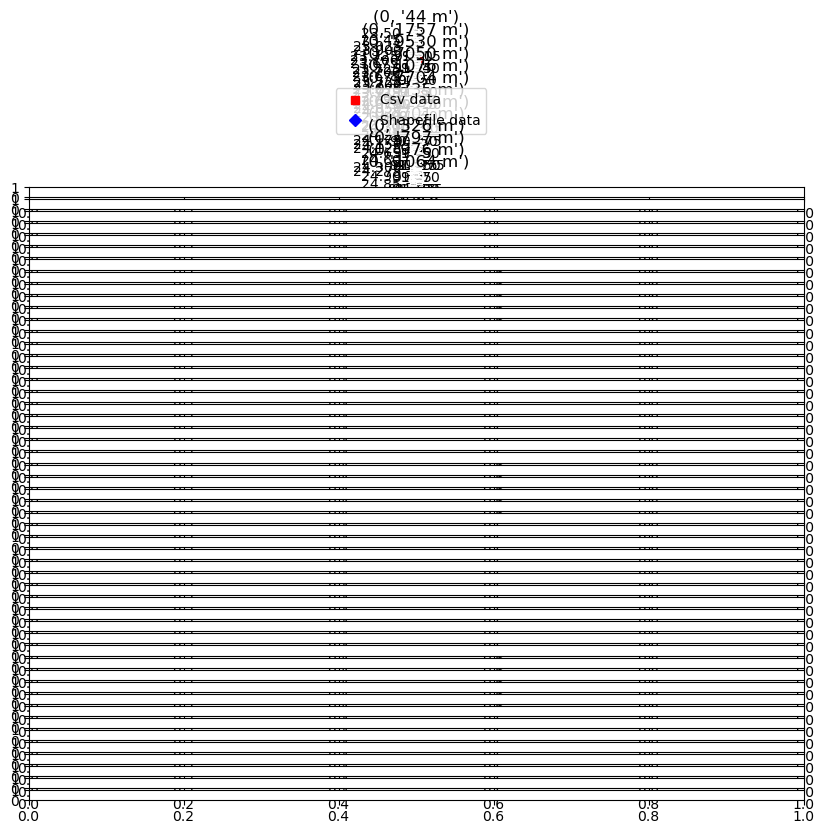

In [214]:
fig,ax=plt.subplots(64,figsize=(10,10))
ax =ax.flatten()
ax_count =0
dict_length = {}
orginal = mlines.Line2D([], [], color='red', marker='s', ls='', label='Csv data')
shapefile = mlines.Line2D([], [], color='blue', marker='D', ls='', label='Shapefile data')

for index, pair in enumerate(final_pair):
    line = LineString([pair[0],pair[1]])
    line_length= sp_ops.transform(transformer.transform ,line).length
    print(line_length)
    gpd.GeoSeries(pair[0],crs="EPSG:4326").plot(ax=ax[index],color="red")
    gpd.GeoSeries(pair[1],crs="EPSG:4326").plot(ax=ax[index],color="blue")
    gpd.GeoSeries(line,crs   ="EPSG:4326").plot(ax=ax[index],color="white")
    gpd.GeoSeries(buffer(line.centroid,0.03),crs   ="EPSG:4326").plot(ax=ax[index],color="pink",alpha=0)
    cx.add_basemap(ax=ax[index],crs="EPSG:4326",attribution_size=0) 
    if index == 8:
        ax[index].legend(handles=[orginal, shapefile],loc="lower center",bbox_to_anchor=(0.0, -0.4, 0.0, 0.0))
    ax[index].title.set_text((df_sections["Unnamed: 0"][0],f"{int(line_length)} m"))
    ax_count =ax_count+1
    dict_length[df_sections["Unnamed: 0"][index]]=line_length/1000
plt.show() 
    

In [215]:
dict_length

{0: 0.0440707237976889,
 1: 1.7576026708634287,
 2: 9.530399215371267,
 3: 7.050880203026716,
 4: 1.0760084293482508,
 5: 7.704041276985551,
 6: 0.7354616667029874,
 7: 1.2275456884565192,
 8: 0.7013767463824739,
 9: 0.3262664108392408,
 10: 0.7971738450006124,
 11: 0.9763173118326024,
 12: 1.0645624825087494}

Text(0.5, 1.0, 'Difference intersections shapefile and csv')

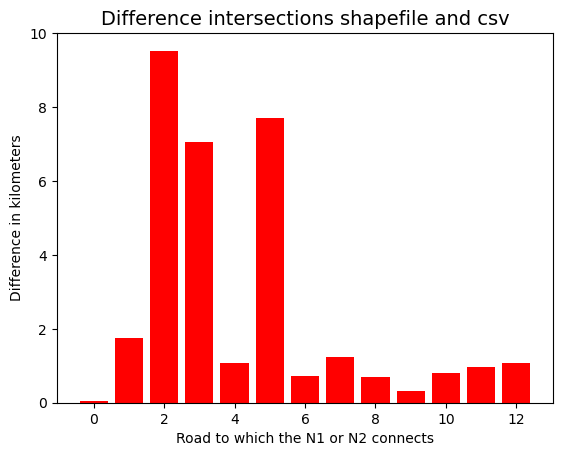

In [216]:
plt.bar(dict_length.keys(), dict_length.values(),color="red")
plt.xlabel("Road to which the N1 or N2 connects")
plt.ylabel("Difference in kilometers")
plt.title("Difference intersections shapefile and csv", fontsize = 14)

In [217]:
df_length  = pd.DataFrame.from_dict(dict_length,orient=dict_length.keys())

AttributeError: 'dict_keys' object has no attribute 'lower'

In [ ]:
shape_file_intersects

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
# gpd.GeoSeries(lines,crs="4326").plot(ax=ax,alpha=0.3)
intersecting_N1.plot(ax=ax,color="red")
intersecting_N2.plot(ax=ax,color="yellow")
df_N1N2.plot(ax=ax,color="white")
gpd.GeoSeries(Intersect_points,crs="4326").plot(ax=ax)
cx.add_basemap(ax=ax,crs="EPSG:4326")

In [ ]:
df_trunk = df_N[((df_N["ref"]=="N1")|(df_N["ref"]=="N2"))]#(df_N["type"]=="trunk")&

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
df_trunk.plot(ax=ax)
cx.add_basemap(crs=4326,ax=ax)
plt.show()

In [ ]:
# main_folder_path =os.path.normpath(os.getcwd() + os.sep + os.pardir)
# df_normal_data = pd.read_csv(main_folder_path + "\\data\\_roads3.csv")
# 
# gdf_normal = gpd.GeoDataFrame(df_normal_data, geometry=gpd.points_from_xy(df_normal_data.lon, df_normal_data.lat), crs="EPSG:4326")
# 
# from shapely import buffer
# lines = []
# for name in ["N1","N2"]:
#     gdf_temp = gdf_normal[gdf_normal["road"]==name]
#     line = buffer(LineString(gdf_temp["geometry"]),0.1)
#     lines.append(line)